In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import data

In [17]:
cust_df = pd.read_csv("/Users/asyzyni/Desktop/E-Commerce Fraud Detection/Customer_DF (1).csv")
transaction_df = pd.read_csv("/Users/asyzyni/Desktop/E-Commerce Fraud Detection/cust_transaction_details (1).csv")

# Data Understanding

In [18]:
cust_df.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [19]:
transaction_df.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [20]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


In [21]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        623 non-null    int64 
 1   customerEmail                     623 non-null    object
 2   transactionId                     623 non-null    object
 3   orderId                           623 non-null    object
 4   paymentMethodId                   623 non-null    object
 5   paymentMethodRegistrationFailure  623 non-null    int64 
 6   paymentMethodType                 623 non-null    object
 7   paymentMethodProvider             623 non-null    object
 8   transactionAmount                 623 non-null    int64 
 9   transactionFailed                 623 non-null    int64 
 10  orderState                        623 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB


# Data Preparation

merge dataset

In [22]:
df = pd.merge(cust_df, transaction_df, how='inner', on='customerEmail')
df.head()

,Unnamed: 0_x,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Unnamed: 0_y,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,0,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,1,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,2,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,3,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,4,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


remove kolom yang tidak digunakan

In [23]:
df = df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

# Exploratory Data Analysis

ringkasan singkat mengenai data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   customerEmail                     819 non-null    object
 1   customerPhone                     819 non-null    object
 2   customerDevice                    819 non-null    object
 3   customerIPAddress                 819 non-null    object
 4   customerBillingAddress            819 non-null    object
 5   No_Transactions                   819 non-null    int64 
 6   No_Orders                         819 non-null    int64 
 7   No_Payments                       819 non-null    int64 
 8   Fraud                             819 non-null    bool  
 9   transactionId                     819 non-null    object
 10  orderId                           819 non-null    object
 11  paymentMethodId                   819 non-null    object
 12  paymentMethodRegistrat

deskripsi statistik

In [26]:
df.describe()

,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,5.195360,3.808303,2.135531,0.100122,35.147741,0.256410
std,2.924214,1.866872,1.860001,0.300346,19.640072,0.436918
min,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,3.000000,3.000000,1.000000,0.000000,22.000000,0.000000
50%,5.000000,4.000000,2.000000,0.000000,34.000000,0.000000
75%,7.000000,5.000000,3.000000,0.000000,46.000000,1.000000
max,15.000000,8.000000,15.000000,1.000000,353.000000,1.000000


missing values

In [27]:
df.isnull().sum()

customerEmail                       0
customerPhone                       0
customerDevice                      0
customerIPAddress                   0
customerBillingAddress              0
No_Transactions                     0
No_Orders                           0
No_Payments                         0
Fraud                               0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
dtype: int64

duplicate values

In [28]:
df.duplicated().sum()

np.int64(0)

## Data Distribution & Visualization

### Kolom Numerik

histogram untuk fitur (kolom) numerik

<Figure size 1000x1000 with 0 Axes>

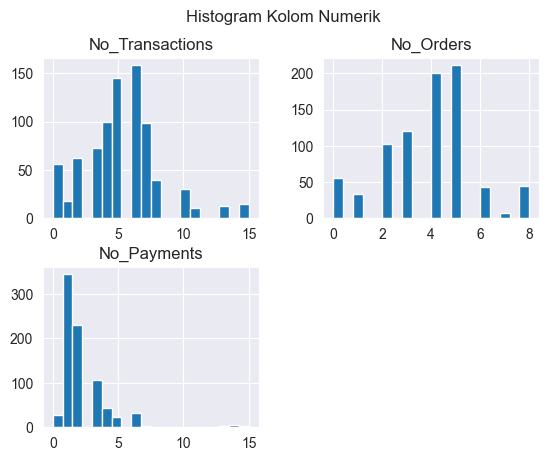

In [30]:
fitur_num = ['No_Transactions', 'No_Orders', 'No_Payments']

plt.figure(figsize = (10,10))
df[fitur_num].hist(bins=20)
plt.suptitle("Histogram Kolom Numerik")
plt.show()

 **Interpretasi Histogram**

**No_Transactions** : data ini terdistribusi normal, menunjukkan bahwa kebanyakan pengguna melakukan transaksi dalam jumlah yang normal

**No_Orders** : pola pemesanan terlihat cukup konsisten, sama seperti transaksi pengguna.

**No_Payments** : distribusinya sangat condong ke kanan (right skewed), ada sedikit pengguna dengan jumlah pembayaran yang tinggi

Boxplot Kolom Numerik

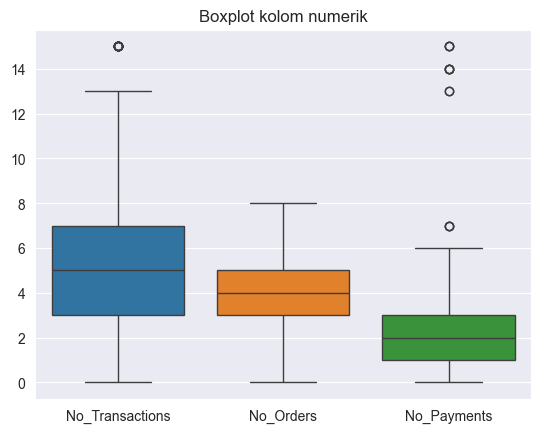

In [31]:
sns.boxplot(data=df[fitur_num])
plt.title("Boxplot kolom numerik")
plt.show()

dari boxplot diatas terdapat outlier pada kolom no_transaction dan no_payments, hal ini menunjukkan bahwa ada anomali pada transaksi dan pembyaran

### Kolom Kategorik

In [32]:
fitur_kategorik = ['paymentMethodRegistrationFailure', 'paymentMethodType', 'paymentMethodProvider', 'transactionFailed', 'orderState']

# simpan total setiap fitur kategorik di sebuah dictionary
numerical_counts = {}
for feature in fitur_kategorik:
    counts = df[feature].value_counts()
    numerical_counts[feature] = counts

for feature, count in numerical_counts.items():
    print(f"Total dari {feature}")
    print(counts)
    print()


Total dari paymentMethodRegistrationFailure
orderState
fulfilled    691
failed        84
pending       44
Name: count, dtype: int64

Total dari paymentMethodType
orderState
fulfilled    691
failed        84
pending       44
Name: count, dtype: int64

Total dari paymentMethodProvider
orderState
fulfilled    691
failed        84
pending       44
Name: count, dtype: int64

Total dari transactionFailed
orderState
fulfilled    691
failed        84
pending       44
Name: count, dtype: int64

Total dari orderState
orderState
fulfilled    691
failed        84
pending       44
Name: count, dtype: int64



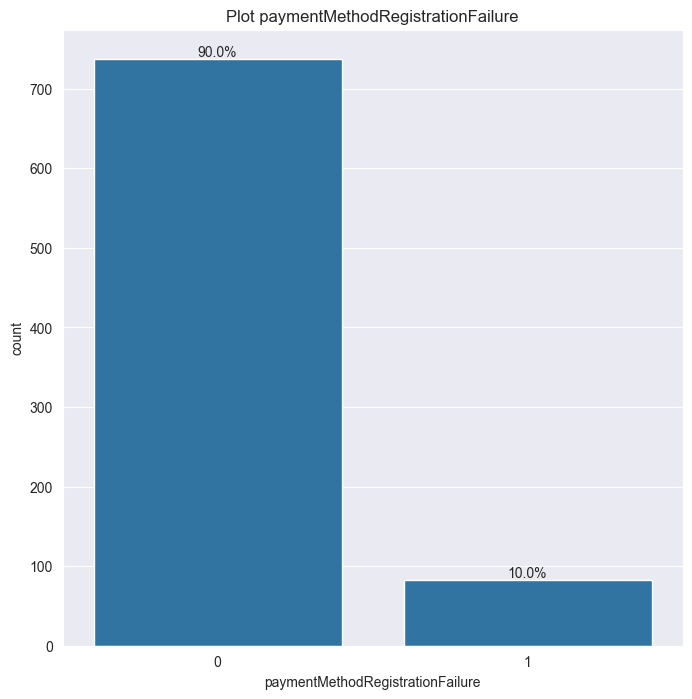

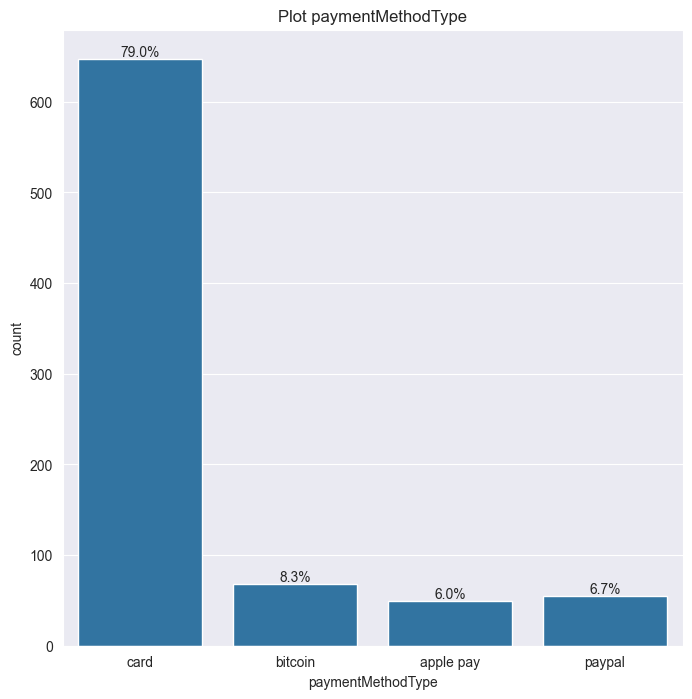

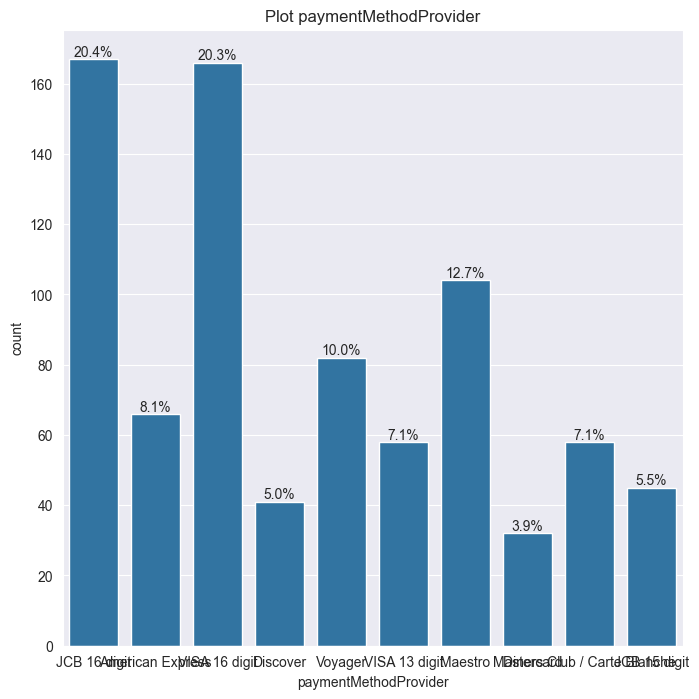

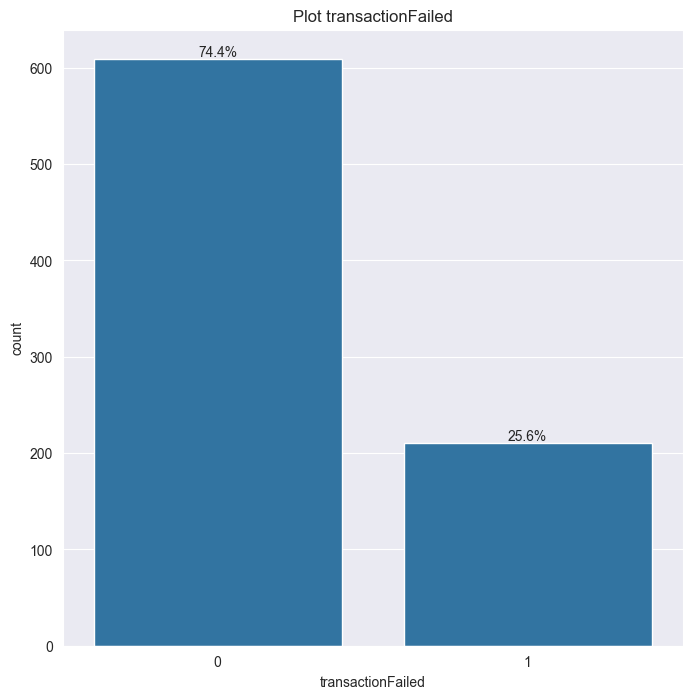

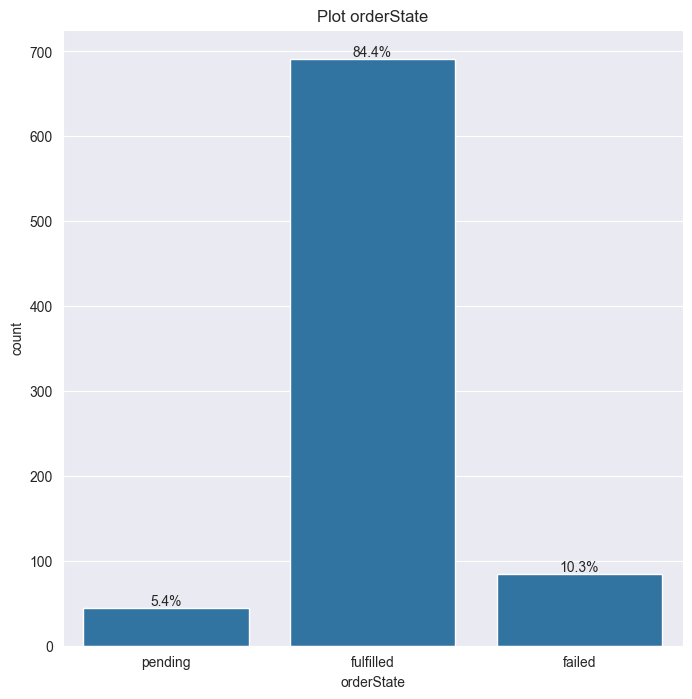

In [87]:
for feature in fitur_kategorik:
    plt.figure(figsize = (8,8))
    ax = sns.countplot(data=df, x=feature)

    # hitung persentase tiap kategori
    total_counts = len(df)
    for p in ax.patches:
        persen = '{:.1f}%'.format(100*p.get_height()/total_counts)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(persen, (x,y), ha='center', va='bottom')

    plt.title(f"Plot {feature}")
    plt.show()

**Interpretasi Grafik**

*Payment Registration Failure :* nilai 0 mendominasi, hal ini menunjukkan bahwa pengguna yang gagal registrasi sangat sedikit

*Payment Method Type :* Distribusi metode ini menunjukkan bahwa dominasi kartu (79%), kemudian diikuti oleh metode lain seperti bitcoin, apple pay, dsb. Hal ini menunjukkan bahwa pengguna masih sangat bergantung pada kartu sebagai cara utama pembayaran.

*Payment Method Provider :* Dilihat dari grafik, distribusi penyedia kartu sangat beragam, hal ini menunjukkan bahwa tidak ada penyedia yang mendominasi sepenuhnya. Ini menunjukkan keberagaman ekosistem pembayaran.

*Transaction Failed* : Plot ini menunjukkan bahwa kegagalan pengguna ketika melakukan transaksi cukup signifikan untuk diperhatikan. Sebab 25% kegagalan cukup tinggi, sehingga diperlukan analisis lebih lanjut apakah penyebabnya provider tertentu atau kondisi pengguna.

*Order State* : Status pesanan yang selesai (fulfilled) mendominasi, kemudian diikuti oleh status gagal (failed) dan menunggu (pending). Hal ini menunjukkan bahwa pemrosesan pesanan berjalan dengan sangatlah efisien.

bersihkan outlier

In [40]:
# hitung quartil pertama dan quartil ketiga

q1 = df[fitur_num].quantile(0.25)
q3 = df[fitur_num].quantile(0.75)

# hitung Interquartile Range (IQR)
iqr = q3 - q1

# tentukan batas atas dan batas bawah untuk outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# identifikasi outlier
outliers = (df[fitur_num] < lower_bound) | (df[fitur_num] > upper_bound)

outlier_row = df[outliers.any(axis=1)]

outlier_row.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
2,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled
338,cathy42@gibson.com,754.248.6239x43965,c3r2qzqwc9anp6utob7n,7493:ab04:47ff:3a14:67d6:a128:a5b6:1500,"046 Carson Crescent\nSouth Jacksonview, NV 228...",3,3,15,True,h469bpo6,d5r0n3,d1nvhtt2q,0,card,Diners Club / Carte Blanche,14,0,fulfilled
339,cathy42@gibson.com,754.248.6239x43965,c3r2qzqwc9anp6utob7n,7493:ab04:47ff:3a14:67d6:a128:a5b6:1500,"046 Carson Crescent\nSouth Jacksonview, NV 228...",3,3,15,True,vj05ozm5,8lc2cq,d1nvhtt2q,0,card,Diners Club / Carte Blanche,23,0,fulfilled


In [41]:
df_cleaned = df[~outliers.any(axis=1)]

In [42]:
df_cleaned

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
5,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,q3lyvbza,yk34y2,8pneoi03z,0,card,JCB 16 digit,33,0,failed
6,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,3alf9irw,28v6b0,8pneoi03z,0,card,JCB 16 digit,24,1,fulfilled
7,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,69w9wymx,28v6b0,8pneoi03z,0,card,JCB 16 digit,24,0,fulfilled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,7yilsi1o,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,1,fulfilled
815,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,c82k5bcv,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,0,fulfilled
816,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,wmh52bns,1bubxa,3zmkegkb8,0,paypal,JCB 15 digit,25,1,fulfilled
817,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,xdw33hfp,p0gdbf,3zmkegkb8,0,paypal,JCB 15 digit,19,0,fulfilled


### Analisis Korelasi

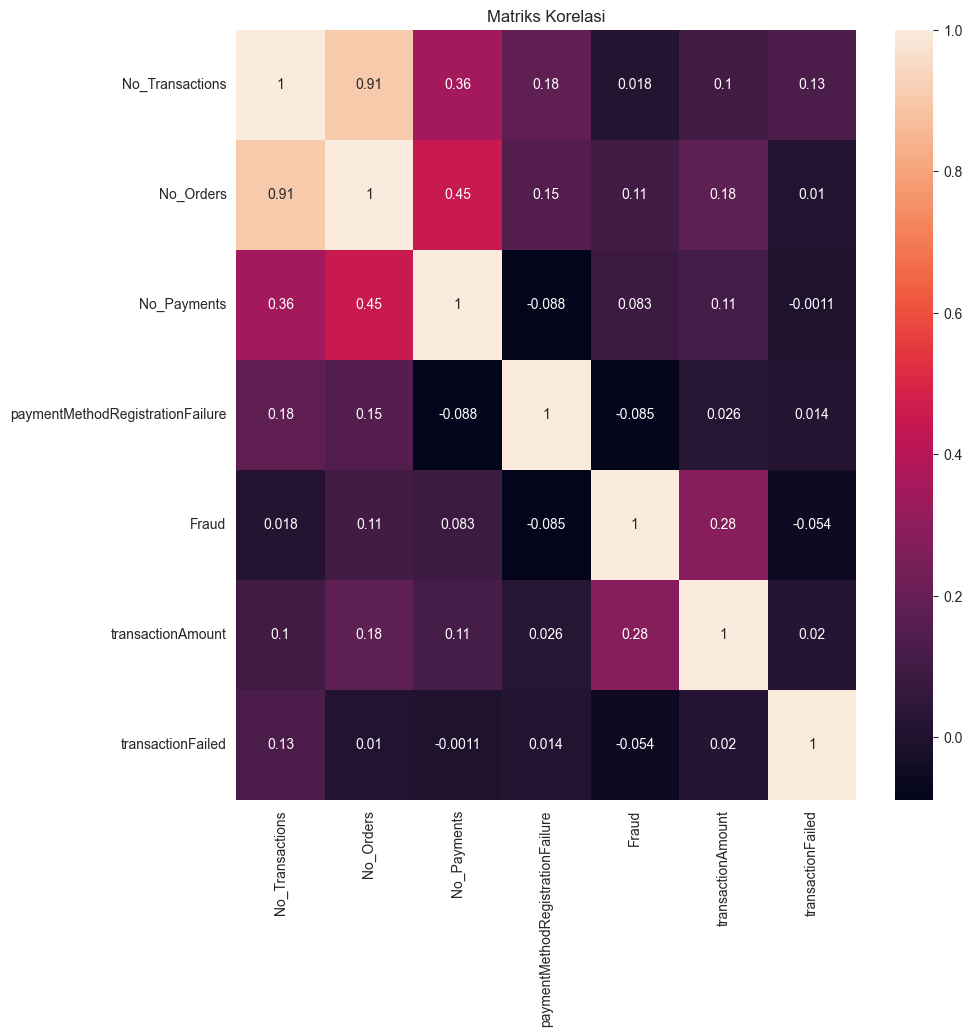

In [44]:
corr_matrix = df_cleaned[["No_Transactions",
                          "No_Orders",
                          "No_Payments",
                          "paymentMethodRegistrationFailure",
                          "Fraud",
                          "transactionAmount",
                          "transactionFailed"]].corr()


# buat heatmap

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.title("Matriks Korelasi")
plt.show()

**interpretasi Matriks Korelasi**

Korelasi paling menonjol

1. *No_Transactions <-> No_Orders* (0,91) : kedua fitur ini memiliki korelasi yang sangat kuat dan positif. Dimana, semakin banyak pesanan (orders) dilakukan semakin banyak transaksi terjadi. Ini merupakan hubungan yang sangat logis secara bisnis.
2. *No_Orders <-> No_Payments* (0.45) : korelasi dari kedua fitur ini berada di tingkat sedang dan positif. Hal ini menunjukkan bahwa jumlah pesanan berhubungan dengan jumlah pembayaran, namun tidak selalu 1:1.
3. *No_Transactions <-> No_Payments* (0.36) : fitur ini memiliki korelasi yang positif lemah hingga sedang.

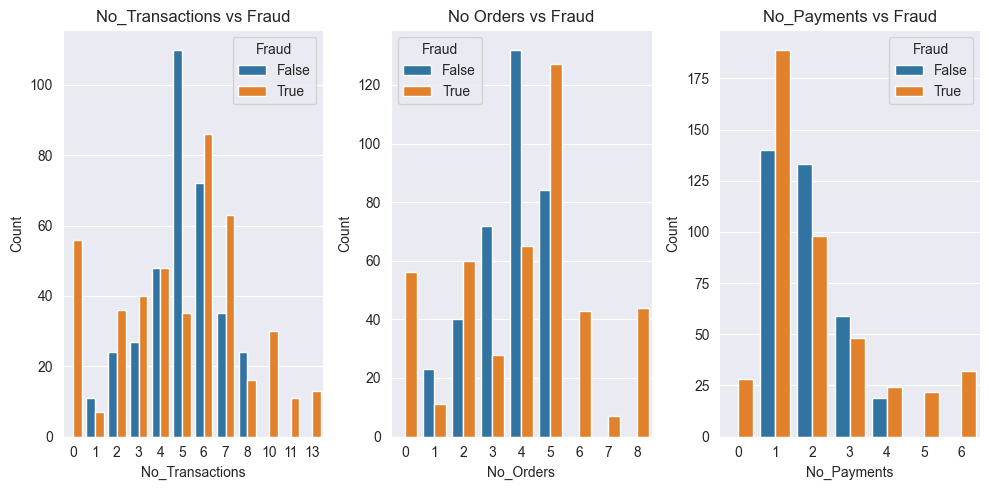

In [45]:
fig, axes = plt.subplots(1,3,figsize=(10,5))

# No_Transaction
sns.countplot(data=df_cleaned, x='No_Transactions', hue='Fraud', ax=axes[0])
axes[0].set_title("No_Transactions vs Fraud")
axes[0].set_xlabel("No_Transactions")
axes[0].set_ylabel('Count')

# No Orders
sns.countplot(data=df_cleaned, x="No_Orders", hue="Fraud", ax=axes[1])
axes[1].set_title("No Orders vs Fraud")
axes[1].set_xlabel("No_Orders")
axes[1].set_ylabel('Count')

# No Payments
sns.countplot(data=df_cleaned, x='No_Payments', hue='Fraud', ax=axes[2])
axes[2].set_title("No_Payments vs Fraud")
axes[2].set_xlabel("No_Payments")
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Feature Engineering

**Tingkat Kesuksesan Transaksi**

Fitur ini menghitung proporsi dari kesuksesan transaksi pada setiap customer

In [55]:
df_cleaned['Transaction_Success_Rate'] = df_cleaned['No_Transactions'] / (df_cleaned['No_Transactions'] + df_cleaned['transactionFailed'])

**Frekuensi Order**

fitur ini menunjukkan seberapa sering customer melakukan order berdasarkan jumlah transaksi

In [56]:
df_cleaned['Order_Freq'] = df_cleaned['No_Orders'] / df['No_Transactions']

**Kebiasaan di masa lampau**

Fitur ini menunjukkan kebiasaan customer di masa lampau

In [57]:
df_cleaned['Past_fraud_transactions'] = df_cleaned['Fraud'].cumsum().shift(fill_value=0)

**Total Transaksi**

fitur ini menghitung total transaksi pada tiap customer

In [58]:
df_cleaned['Total_Transaction'] = df_cleaned['No_Transactions'] * df_cleaned['transactionAmount']

In [60]:
df_cleaned.isnull().sum()

customerEmail                        0
customerPhone                        0
customerDevice                       0
customerIPAddress                    0
customerBillingAddress               0
No_Transactions                      0
No_Orders                            0
No_Payments                          0
Fraud                                0
transactionId                        0
orderId                              0
paymentMethodId                      0
paymentMethodRegistrationFailure     0
paymentMethodType                    0
paymentMethodProvider                0
transactionAmount                    0
transactionFailed                    0
orderState                           0
Transaction_Success_Rate            44
Order_Freq                          56
Past_fraud_transactions              0
Total_Transaction                    0
dtype: int64

**Bersihkan Missing Value**

In [61]:
data = df_cleaned.fillna(0)

pd.set_option('display.max_columns', None)

data.columns

Index(['customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress', 'No_Transactions', 'No_Orders', 'No_Payments',
       'Fraud', 'transactionId', 'orderId', 'paymentMethodId',
       'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'transactionAmount', 'transactionFailed',
       'orderState', 'Transaction_Success_Rate', 'Order_Freq',
       'Past_fraud_transactions', 'Total_Transaction'],
      dtype='object')

data yang kosong diisi dengan angka 0 dikarenakan kolom yang berisi data kosong itu adalah hasil feature engineering. sehingga angka 0 dirasa paling pas

### Encoding

In [63]:
cat_kol = ['customerEmail',
           'customerPhone',
           'customerDevice',
           'customerIPAddress',
           'customerBillingAddress',
           'transactionId',
           'orderId',
           'paymentMethodId',
           'paymentMethodType','paymentMethodProvider','orderState']

data_encoded = data.copy()

for col in cat_kol:
    freq = data_encoded[col].value_counts(normalize=True)

    data_encoded[col+"_freq_encoded"] = data_encoded[col].map(freq)


data_encoded.drop(cat_kol, axis=1, inplace=True)
data_encoded.columns

Index(['No_Transactions', 'No_Orders', 'No_Payments', 'Fraud',
       'paymentMethodRegistrationFailure', 'transactionAmount',
       'transactionFailed', 'Transaction_Success_Rate', 'Order_Freq',
       'Past_fraud_transactions', 'Total_Transaction',
       'customerEmail_freq_encoded', 'customerPhone_freq_encoded',
       'customerDevice_freq_encoded', 'customerIPAddress_freq_encoded',
       'customerBillingAddress_freq_encoded', 'transactionId_freq_encoded',
       'orderId_freq_encoded', 'paymentMethodId_freq_encoded',
       'paymentMethodType_freq_encoded', 'paymentMethodProvider_freq_encoded',
       'orderState_freq_encoded'],
      dtype='object')

# Feature Selection

In [73]:
df_select = data_encoded[['No_Transactions', 'No_Orders', 'No_Payments', 'Fraud',
       'paymentMethodRegistrationFailure', 'transactionAmount',
       'transactionFailed', 'Transaction_Success_Rate', 'Order_Freq',
       'Past_fraud_transactions', 'Total_Transaction',
       'customerEmail_freq_encoded', 'customerPhone_freq_encoded',
       'customerDevice_freq_encoded', 'customerIPAddress_freq_encoded',
       'customerBillingAddress_freq_encoded', 'transactionId_freq_encoded',
       'orderId_freq_encoded', 'paymentMethodId_freq_encoded',
       'paymentMethodType_freq_encoded', 'paymentMethodProvider_freq_encoded',
       'orderState_freq_encoded']]

X = df_select.drop('Fraud', axis=1)
y = df_select['Fraud']

# split data jadi testing dan training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)



In [74]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# prediksi pada test set
y_pred = model.predict(X_test)

evaluasi model

In [75]:
accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_score}")

Accuracy: 0.949685534591195


feature importance

In [78]:
feature_importance = model.feature_importances_
feature_names = X.columns

feature_importance_data = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})

feature_importance_data = feature_importance_data.sort_values(by='importance', ascending=False)

print(feature_importance_data.head())

                           feature  importance
13  customerIPAddress_freq_encoded    0.146544
12     customerDevice_freq_encoded    0.088876
2                      No_Payments    0.078306
4                transactionAmount    0.073520
10      customerEmail_freq_encoded    0.073063


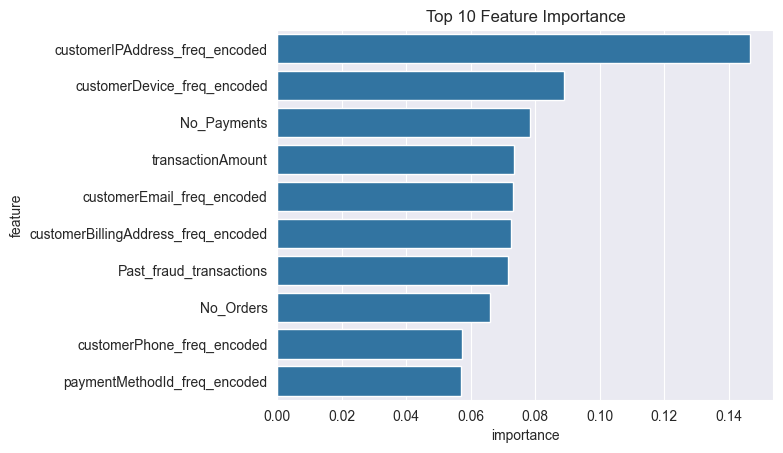

In [90]:
sns.barplot(x='importance', y='feature', data=feature_importance_data.head(10))
plt.title('Top 10 Feature Importance')
plt.show()

feature importance digunakan untuk mengetahui fitur mana yang paling berpengaruh terhadap prediksi model. Seperti yang diliat diatas, semakin tinggi nilai importance nya semakin besar kontribusinya.

### Confusion Matrix

In [83]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[69  1]
 [ 7 82]]


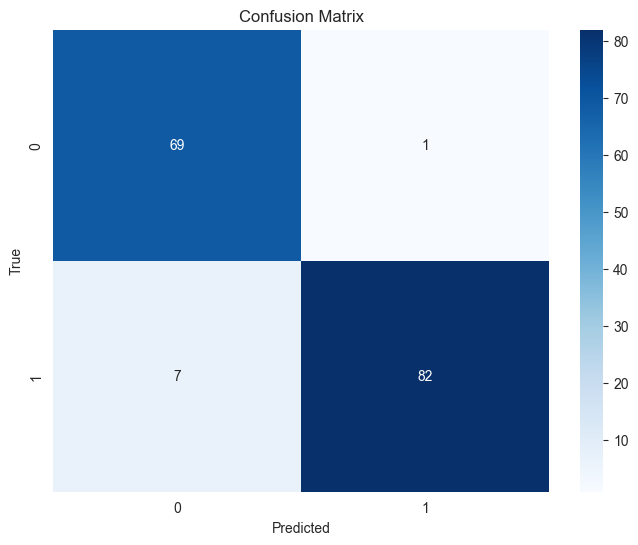

In [84]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

generate classification report

In [86]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.99      0.95        70
        True       0.99      0.92      0.95        89

    accuracy                           0.95       159
   macro avg       0.95      0.95      0.95       159
weighted avg       0.95      0.95      0.95       159



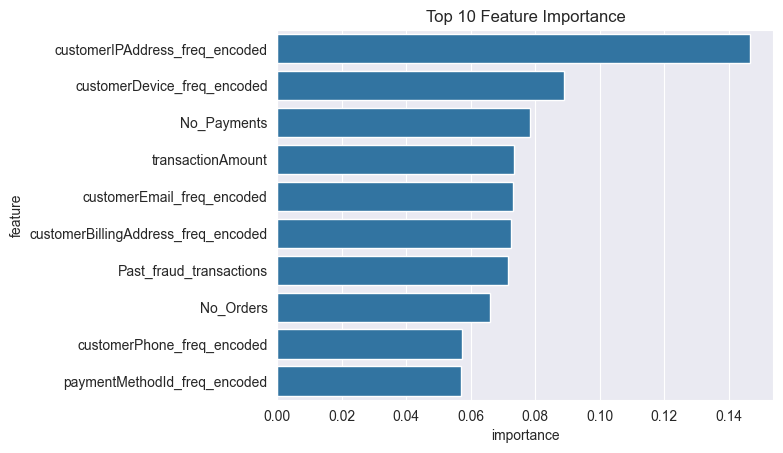